In [8]:
#install.packages("tidyverse")
#install.packages("gganimate")
#install.packages("plotly")
#install.packages("gifski")
#install.packages("RColorBrewer")
#install.packages("wesanderson")
#install.packages("factoextra")


library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)
library(factoextra) #no library

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




ERROR: Error in library(factoextra): there is no package called 'factoextra'


In [1]:
casos <-  read.csv(file="Casos_Diarios_Estado_Nacional.csv")

casos_diarios_k <- casos[,!(names(casos) %in% c("nombre"))]
head(casos_diarios_k)

,cve_ent,poblacion,X26.02.2020,X27.02.2020,X28.02.2020,X29.02.2020,X01.03.2020,X02.03.2020,X03.03.2020,X04.03.2020,⋯,X18.06.2022,X19.06.2022,X20.06.2022,X21.06.2022,X22.06.2022,X23.06.2022,X24.06.2022,X25.06.2022,X26.06.2022,X27.06.2022
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1434635,0,0,0,0,0,0,0,0,⋯,23,11,162,135,141,162,67,3,1,0
2,2,3634868,0,0,0,0,0,0,0,0,⋯,43,33,317,364,307,295,183,19,10,0
3,3,804708,0,0,0,0,0,0,0,0,⋯,63,52,366,335,366,348,294,43,49,1
4,4,1000617,0,0,0,0,0,0,0,0,⋯,22,33,108,95,113,91,83,26,2,0
5,7,5730367,0,0,0,1,0,0,0,0,⋯,3,7,20,16,11,19,17,0,1,0
6,8,3801487,0,0,0,0,0,0,0,0,⋯,58,45,242,220,227,208,91,4,1,0


In [19]:
# Kmeans Clustering :)
resultado <- kmeans(casos_diarios_k,6)

In [21]:
datos <- cbind(cluster = resultado$cluster,casos)
#head(datos)

In [22]:
#resultado$centers

In [23]:
casos_diarios_list <- gather(datos, key="dias", value="infectados",5:857)
#head(casos_diarios_list)

In [29]:


normalizarfecha <- function(fecha){
    return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {
    labels_meses <- c(
        "Ene","Feb","Mar","Abr","May","Jun",
        "Jul","Ago","Sep","Oct","Nov","Dic")
    return(factor(x,levels = (1:12),labels = labels_meses))}

fecha <-map(casos_diarios_list[5],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diarios_list[c(TRUE,TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)

datos <- separate(data=casos_diarios_fecha,
                col=dias,
                into= c("dia","mes","año"),
                sep ='/',
                remove=FALSE)

datos <- datos %>%
    mutate(mes_txt=cod_Meses(as.integer(mes)))%>%
    mutate(consecutivo=1:28149)%>%
    filter(nombre!="NACIONAL")

#head(datos)

datosEnt <- datos %>%
    filter(cluster==3)

datosEnt



cluster,cve_ent,poblacion,nombre,infectados,dias,dia,mes,año,mes_txt,consecutivo
<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>
3,10,1868996,DURANGO,0,26/02/2020,26,02,2020,Feb,10
3,17,2044058,MORELOS,0,26/02/2020,26,02,2020,Feb,17
3,22,2279637,QUERETARO,0,26/02/2020,26,02,2020,Feb,22
3,23,1723259,QUINTANA ROO,0,26/02/2020,26,02,2020,Feb,23
3,27,2572287,TABASCO,0,26/02/2020,26,02,2020,Feb,27
3,31,2259098,YUCATAN,0,26/02/2020,26,02,2020,Feb,31
3,32,1666426,ZACATECAS,0,26/02/2020,26,02,2020,Feb,32
3,10,1868996,DURANGO,0,27/02/2020,27,02,2020,Feb,43
3,17,2044058,MORELOS,0,27/02/2020,27,02,2020,Feb,50


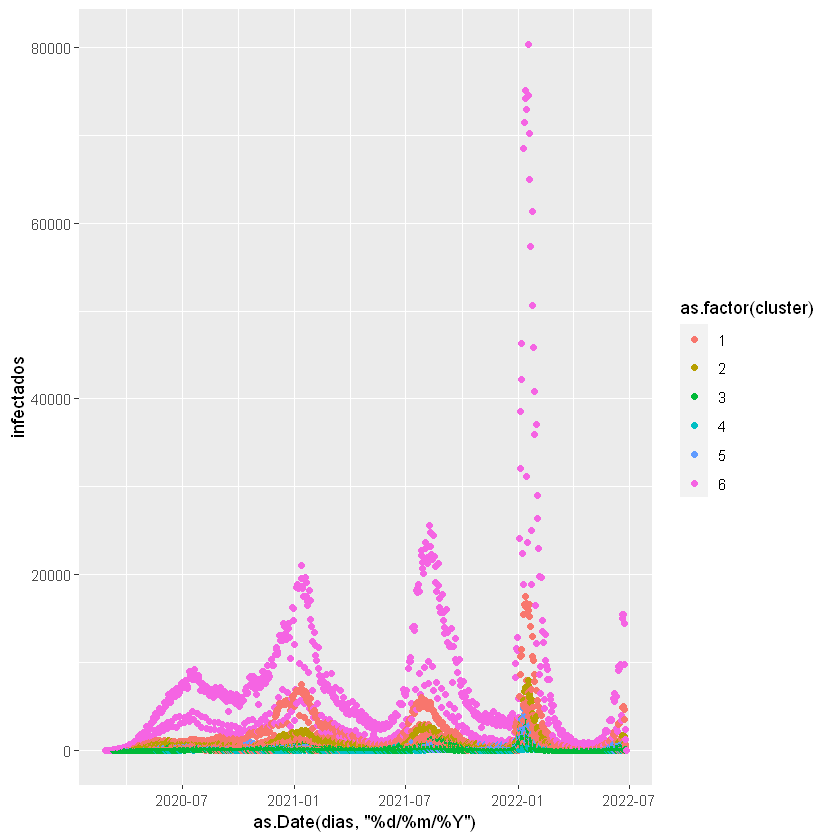

In [25]:
datos%>% ggplot(aes(x= as.Date(dias,"%d/%m/%Y"), 
                                y=infectados, 
                                group=cluster, 
                                color=as.factor(cluster)))+
    geom_point()